<a href="https://colab.research.google.com/github/ofekPeles/CourseINT/blob/main/Amazon_canceled_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Amazon canceled - Dataset**

Project Objective

The goal of this project is to predict whether an Amazon delivery in India will be canceled or not.
To achieve this, I used a dataset obtained from Kaggle, containing real-world order and delivery information.

The project includes both:

✅ Supervised Machine Learning models for classification

✅ Unsupervised Learning techniques for exploratory analysis and anomaly detection



# Import libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
import joblib
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import zscore
from seaborn import heatmap
from sklearn.decomposition import PCA
import shap
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans,DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from xgboost import plot_importance

# About Data

In [2]:
Amazon = pd.read_csv("/content/Amazon Sale Report.csv")

In [3]:
Amazon.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [4]:
Amazon.shape

(128976, 21)

In [5]:
Amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

# **Preprossesing Data**

# Duplicate data

In [6]:
def show_duplicate_values(df):
    print("show_duplicate_values")
    print(df.duplicated().sum())
    df = df.drop_duplicates(keep='first')
    return(df)
Amazon=show_duplicate_values(Amazon)

show_duplicate_values
168


# Mising Data

In [7]:
Amazon.isnull().sum()[Amazon.isnull().sum()>0]

,0
currency,7789
Amount,7789
ship-city,33
ship-state,33
ship-postal-code,33
ship-country,33
fulfilled-by,89595
New,128808
PendingS,128808


In [8]:
Amazon.value_counts("fulfilled-by")

,count
fulfilled-by,
Easy Ship,39213


In [9]:
def value_counts(df):
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
      print(f"The column is {column}: {df[column].value_counts().shape}")
value_counts(Amazon)

The column is Order ID: (120229,)
The column is Date: (91,)
The column is Status: (13,)
The column is Fulfilment: (2,)
The column is Sales Channel: (2,)
The column is ship-service-level: (2,)
The column is Category: (9,)
The column is Size: (11,)
The column is Courier Status: (4,)
The column is currency: (1,)
The column is ship-city: (8948,)
The column is ship-state: (69,)
The column is ship-country: (1,)
The column is fulfilled-by: (1,)


In [10]:
Amazon.drop(["PendingS","New","fulfilled-by","currency","ship-country"],axis=1,inplace=True)

In [11]:
print(Amazon[Amazon[["Amount","ship-city","ship-state"]] .isnull().all(axis=1)].shape)
print(Amazon[Amazon[["ship-city","ship-state"]] .isnull().all(axis=1)].shape)

(2, 16)
(33, 16)


In [12]:
Amazon = Amazon.dropna(subset=['Amount'])
Amazon = Amazon.dropna(subset=['ship-city'])
Amazon.info()
Amazon.isnull().sum()[Amazon.isnull().sum()>0]

<class 'pandas.core.frame.DataFrame'>
Index: 120988 entries, 0 to 128975
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               120988 non-null  int64  
 1   Order ID            120988 non-null  object 
 2   Date                120988 non-null  object 
 3   Status              120988 non-null  object 
 4   Fulfilment          120988 non-null  object 
 5   Sales Channel       120988 non-null  object 
 6   ship-service-level  120988 non-null  object 
 7   Category            120988 non-null  object 
 8   Size                120988 non-null  object 
 9   Courier Status      120988 non-null  object 
 10  Qty                 120988 non-null  int64  
 11  Amount              120988 non-null  float64
 12  ship-city           120988 non-null  object 
 13  ship-state          120988 non-null  object 
 14  ship-postal-code    120988 non-null  float64
 15  B2B                 120988 non-null  bo

,0


Conclotion📘 About data:

✅ The columns with Nan valuse is currency, Amount, ship-city, ship-state, ship-postal-code, ship-country, fulfilled-by, New and PendingS

I decided to delete the fulfilled-by, New and PendingS columns

# Convert categorical data

In [13]:
print(Amazon["Status"].unique())
print(Amazon["Category"].unique())
print(Amazon["Size"].unique())
print(Amazon["Courier Status"].unique())
print(Amazon["ship-service-level"].unique())
print(Amazon["Fulfilment"].unique())

['Cancelled' 'Shipped - Delivered to Buyer' 'Shipped'
 'Shipped - Returned to Seller' 'Shipped - Rejected by Buyer'
 'Shipped - Lost in Transit' 'Shipped - Out for Delivery'
 'Shipped - Returning to Seller' 'Shipped - Picked Up' 'Pending'
 'Pending - Waiting for Pick Up' 'Shipped - Damaged']
['T-shirt' 'Shirt' 'Blazzer' 'Trousers' 'Perfume' 'Socks' 'Shoes' 'Wallet'
 'Watch']
['S' '3XL' 'XL' 'L' 'XXL' 'XS' '6XL' 'M' '4XL' 'Free' '5XL']
['On the Way' 'Shipped' 'Unshipped']
['Standard' 'Expedited']
['Merchant' 'Amazon']


In [14]:
map = {"XS":0,"S":1,"M":2,"L":3,"XL":4,"XXL":5,"3XL":6,"4XL":7,"5XL":8,"6XL":9,"Free":10}
Amazon["Size_map"] = Amazon["Size"].map(map)

In [15]:
map = {"On the Way":0,"Shipped":1,"Unshipped":2}
Amazon["Courier Status_map"] = Amazon["Courier Status"].map(map)

In [16]:
map = {"Standard":0,"Expedited":1}
Amazon["ship-service-level_map"] = Amazon["ship-service-level"].map(map)

In [17]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_array = encoder.fit_transform(Amazon[["Status"]])
encoded_df = pd.DataFrame(encoded_array,columns=encoder.get_feature_names_out(["Status"]),index=Amazon.index)
Amazon = pd.concat([Amazon, encoded_df], axis=1)

Conclotion📘 Convert categorical data:

✅ I choose to Convert part of the categorical columns by map method and part by encoder method

# PCA

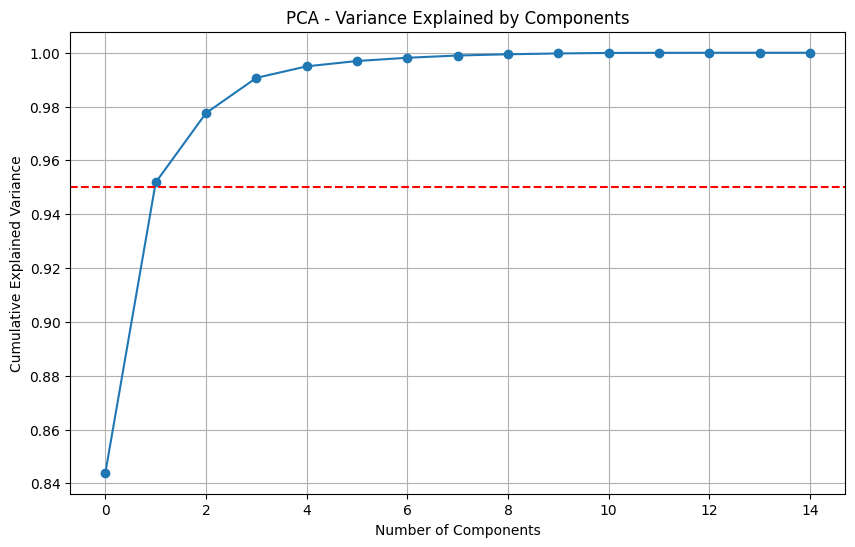


🧭 Top features for Principal Component 1:

🧭 Top features for Principal Component 2:
Status_Shipped                         0.606952
ship-service-level_map                 0.606031
Status_Shipped - Delivered to Buyer   -0.507162
Qty                                    0.060690
Courier Status_map                     0.053780
dtype: float64


In [18]:
def PCA_varience_precentage(data,variance_threshold):
    numeric_data = data.select_dtypes(include=np.number)

    # שלב 1: PCA מלא כדי לבדוק את השונות המצטברת
    pca_full = PCA()
    X_pca_full = pca_full.fit_transform(numeric_data)

    # שלב 2: גרף שונות מצטברת
    cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
    plt.figure(figsize=(10, 6))
    plt.plot(cumulative_variance, marker='o')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.grid(True)
    plt.title('PCA - Variance Explained by Components')
    plt.axhline(y=variance_threshold, color='r', linestyle='--')
    plt.show()

    # שלב 3: בודקים כמה רכיבים נדרשים כדי לשמר את אחוז השונות
    n_components = np.argmax(cumulative_variance >= variance_threshold) + 1
    pca = PCA(n_components=n_components)
    X_reduced = pca.fit_transform(numeric_data)
    feature_names = numeric_data.columns
    for i, component in enumerate(pca.components_):
      importance = pd.Series(component, index=feature_names).sort_values(key=np.abs, ascending=False)
      print(f"\n🧭 Top features for Principal Component {i+1}:")
    print(importance.head(5))

PCA_varience_precentage(Amazon.drop(["ship-postal-code", "index", "Amount","Status_Cancelled"], axis=1),0.95)

Conclotion📘 PCA:

✅ One column accounts for 95% of the variance, indicating strong dominance. Additionally, the columns ship-postal-code, index, Amount, and Status_Cancelled exhibit very high variance, which may significantly influence the model's behavior

# **Anomaly Detection**

In [19]:
def detect_outliers_iqr(df):
    # Mark outliers based on IQR
    all_outliers = set()
    for col in df.select_dtypes(include=np.number):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        mask = ((df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR))
        outliers = df[~mask].index
        all_outliers.update(outliers)
    return (pd.Series(list(all_outliers)))

def detect_anomaly_isolation_forest(df):
    model = IsolationForest(contamination=0.05)
    model.fit(df)
    anomalies = model.predict(df)
    mask = pd.Series(anomalies == -1, index=df.index)
    return df[mask].index

def detect_outliers_OneClassSVM(df):
    model = OneClassSVM(nu=0.05, kernel="rbf", gamma='scale')
    model.fit(df)
    anomalies = model.predict(df)
    mask = pd.Series(anomalies == -1, index=df.index)
    return(df[mask].index)

def detect_outliers_LOF(df):
    model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
    anomalies = model.fit_predict(df)
    mask = pd.Series(anomalies == -1, index=df.index)
    return(df[mask].index)

def detect_outliers_z_score(df):
    # Mark outliers based on Z-score
    model = zscore(df)
    mask = np.abs(model) > 3
    return(df[mask].index)

Index([     0,      3,     23,     83,    178,    227,    228,    245,    252,
          271,
       ...
       128735, 128748, 128762, 128763, 128815, 128847, 128876, 128877, 128891,
       128966],
      dtype='int64', length=6050)


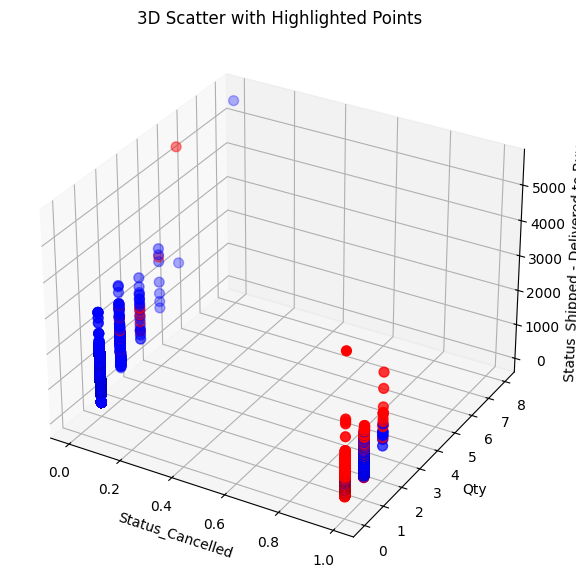

In [20]:
index_isolation_forest = detect_anomaly_isolation_forest(Amazon[Amazon.select_dtypes(include=np.number).columns])
print(index_isolation_forest)
def Anomaly_Detection_plot(df,highlight_idx):
  colors = ['red' if i in highlight_idx else 'blue' for i in df.index]


  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(df['Status_Cancelled'], df['Qty'], df['Amount'], c=colors, s=50)

  ax.set_xlabel('Status_Cancelled')
  ax.set_ylabel('Qty')
  ax.set_zlabel('Status_Shipped - Delivered to Buyer')
  ax.set_title("3D Scatter with Highlighted Points")

  plt.show()
Anomaly_Detection_plot(Amazon,index_isolation_forest)

Index([     2,      6,     52,     56,     64,     78,     82,     86,     99,
          100,
       ...
       128884, 128893, 128902, 128912, 128919, 128923, 128926, 128927, 128947,
       128967],
      dtype='int64', length=6050)


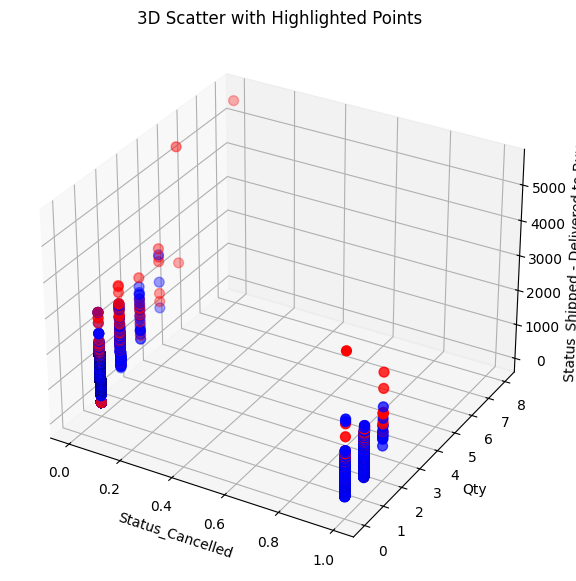

In [21]:
index_LOF = detect_outliers_LOF(Amazon[Amazon.select_dtypes(include=np.number).columns])
print(index_LOF)
def Anomaly_Detection_plot(df,highlight_idx):
  colors = ['red' if i in highlight_idx else 'blue' for i in df.index]


  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(df['Status_Cancelled'], df['Qty'], df['Amount'], c=colors, s=50)

  ax.set_xlabel('Status_Cancelled')
  ax.set_ylabel('Qty')
  ax.set_zlabel('Status_Shipped - Delivered to Buyer')
  ax.set_title("3D Scatter with Highlighted Points")

  plt.show()
Anomaly_Detection_plot(Amazon,index_LOF)

Index([     0,      0,      0,      3,      3,      3,     23,     23,     23,
           40,
       ...
       128952, 128957, 128962, 128962, 128963, 128963, 128966, 128966, 128970,
       128970],
      dtype='int64', length=34888)


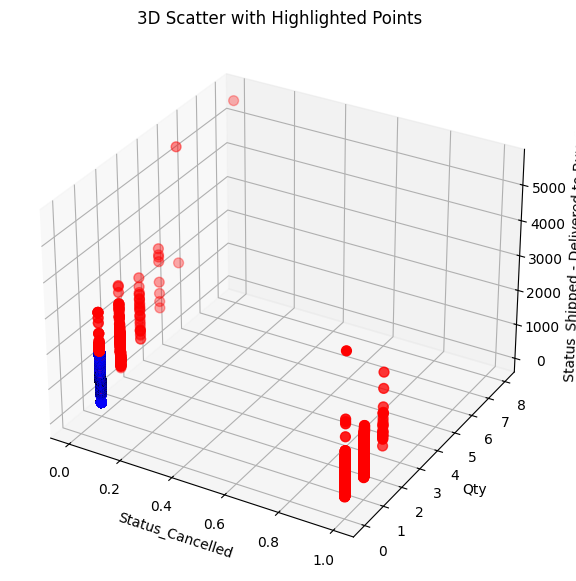

In [22]:
index_z_score = detect_outliers_z_score(Amazon[Amazon.select_dtypes(include=np.number).columns])
print(index_z_score)
def Anomaly_Detection_plot(df,highlight_idx):
  colors = ['red' if i in highlight_idx else 'blue' for i in df.index]


  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(df['Status_Cancelled'], df['Qty'], df['Amount'], c=colors, s=50)

  ax.set_xlabel('Status_Cancelled')
  ax.set_ylabel('Qty')
  ax.set_zlabel('Status_Shipped - Delivered to Buyer')
  ax.set_title("3D Scatter with Highlighted Points")

  plt.show()
Anomaly_Detection_plot(Amazon,index_z_score)

0             0
1             1
2             3
3             7
4            12
          ...  
47468    128958
47469    128962
47470    128963
47471    128966
47472    128970
Length: 47473, dtype: int64


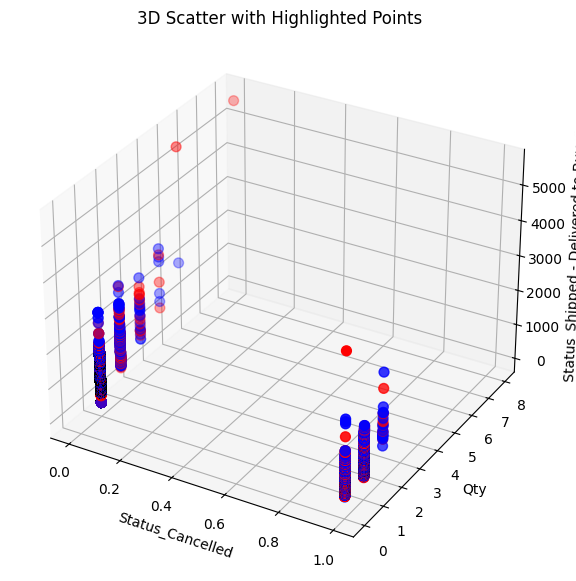

In [23]:
index_Q = detect_outliers_iqr(Amazon[Amazon.select_dtypes(include=np.number).columns])
print(index_Q)
def Anomaly_Detection_plot(df,highlight_idx):
  colors = ['red' if i in highlight_idx else 'blue' for i in df.index]


  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(df['Status_Cancelled'], df['Qty'], df['Amount'], c=colors, s=50)

  ax.set_xlabel('Status_Cancelled')
  ax.set_ylabel('Qty')
  ax.set_zlabel('Status_Shipped - Delivered to Buyer')
  ax.set_title("3D Scatter with Highlighted Points")

  plt.show()
Anomaly_Detection_plot(Amazon,index_Q)

304


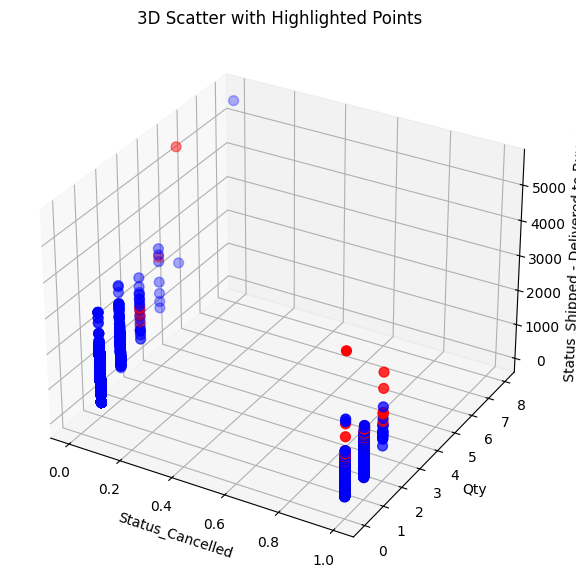

In [24]:
share_index = set(index_isolation_forest) & set(index_LOF)
print(len(share_index))
def Anomaly_Detection_plot(df,highlight_idx):
  colors = ['red' if i in highlight_idx else 'blue' for i in df.index]


  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(df['Status_Cancelled'], df['Qty'], df['Amount'], c=colors, s=50)

  ax.set_xlabel('Status_Cancelled')
  ax.set_ylabel('Qty')
  ax.set_zlabel('Status_Shipped - Delivered to Buyer')
  ax.set_title("3D Scatter with Highlighted Points")

  plt.show()
Anomaly_Detection_plot(Amazon,share_index)

In [25]:
Amazon.drop(share_index,inplace=True)

In [26]:
# ודא שהתאריך בפורמט datetime
Amazon["Date"] = pd.to_datetime(Amazon["Date"], errors="coerce")

# יצירת עמודות חדשות
Amazon["Day"] = Amazon["Date"].dt.day
Amazon["Month"] = Amazon["Date"].dt.month
Amazon["Year"] = Amazon["Date"].dt.year


<ipython-input-26-4791b273555a>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Amazon["Date"] = pd.to_datetime(Amazon["Date"], errors="coerce")


**📘 Conclusion – Anomaly Detection**

✅ Z-Score identified 34,888 anomalous values.

✅ Isolation Forest (configured to 5% contamination) identified 6,050 anomalies.

✅ Local Outlier Factor (LOF) with 5% contamination also identified 6,050 anomalies.

✅ IQR Method (Q method) detected 47,473 anomalies.

📌 Based on these results, I chose to combine the anomalies detected by LOF and Isolation Forest in order to remove a high-percentage subset of consistent anomalies while maintaining model robustness.


# **Divide Between Train and Test**

In [27]:
X = Amazon.drop(["Status_Cancelled"],axis=1)
y = Amazon["Status_Cancelled"]
X_train, X_test_real, y_train, y_test_real = train_test_split(X, y, test_size=0.2, random_state=42)
Amazon_data = pd.concat([X_train, y_train], axis=1)


# **Visualisation Data**

In [28]:
Amazon_data_categorical =Amazon_data.select_dtypes(include=['object'])
Amazon_data_numeric = Amazon_data.select_dtypes(include=np.number)

In [29]:
Amazon_data_categorical.columns

Index(['Order ID', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'ship-city',
       'ship-state'],
      dtype='object')

In [30]:
def plot_histograms(df,col):
  print("plot_histograms")
  sns.histplot(df[col], bins=20, kde=True)
  plt.xlabel("Value")
  plt.ylabel("Frequency")
  plt.title(f"Distribution of {col}")
  plt.show()

def scatter_plot(df,col,target_column):
  print("scatter_plot")
  sns.scatterplot(data=df,x=col,y=target_column)
  plt.show()

def categorical_plot(df,col):
  print("categorical_plot")
  sns.countplot(data=df,x=col)
  plt.show()

def categorical_count(df,col):
  print("categorical_count")
  num=df[col].value_counts().shape[0]
  for i in range(num):
    print(df[col].value_counts().index[i], df[col].value_counts().iloc[i])


Conclusion📘

I created two separate datasets to support different stages of analysis:

📁 Amazon_data_categorical – containing all categorical features

📁 Amazon_data_numeric – containing all numerical columns

This separation allows for more efficient preprocessing, analysis, and model optimization based on the type of data.

# Visualisation categorical column

**Category**

categorical_plot


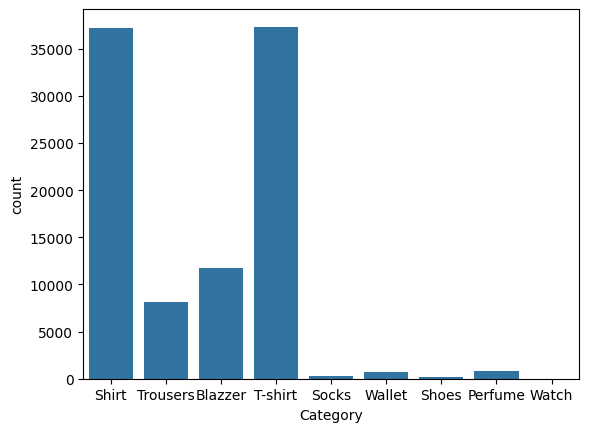

categorical_count
T-shirt 37334
Shirt 37249
Blazzer 11753
Trousers 8167
Perfume 868
Wallet 701
Socks 340
Shoes 132
Watch 3


In [31]:
categorical_plot(Amazon_data_categorical,"Category")
categorical_count(Amazon_data_categorical,"Category")

In [32]:
Amazon_data_categorical.loc[
    Amazon_data_categorical["Category"].isin(["Wallet", "Socks", "Shoes", "Watch"]),
    "Category"
] = "other"
categorical_count(Amazon_data_categorical,"Category")

categorical_count
T-shirt 37334
Shirt 37249
Blazzer 11753
Trousers 8167
other 1176
Perfume 868


# ship-state

categorical_plot


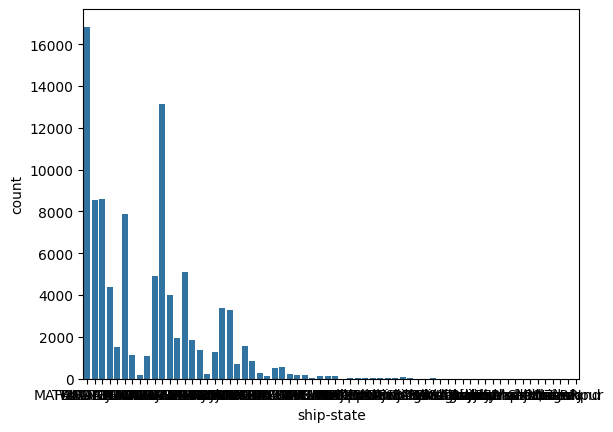

categorical_count
MAHARASHTRA 16837
KARNATAKA 13128
TAMIL NADU 8601
TELANGANA 8531
UTTAR PRADESH 7862
DELHI 5116
KERALA 4896
WEST BENGAL 4389
ANDHRA PRADESH 4019
Gujarat 3362
HARYANA 3282
RAJASTHAN 1967
MADHYA PRADESH 1862
ODISHA 1576
BIHAR 1508
PUNJAB 1385
ASSAM 1255
UTTARAKHAND 1150
JHARKHAND 1088
GOA 828
CHHATTISGARH 692
HIMACHAL PRADESH 573
JAMMU & KASHMIR 519
PUDUCHERRY 265
CHANDIGARH 242
MANIPUR 234
ANDAMAN & NICOBAR 183
MEGHALAYA 159
SIKKIM 156
NAGALAND 136
Delhi 125
TRIPURA 110
ARUNACHAL PRADESH 108
New Delhi 62
MIZORAM 56
DADRA AND NAGAR 47
Rajasthan 44
LADAKH 35
Goa 24
Punjab 22
delhi 18
Bihar 17
Odisha 15
punjab 13
Chandigarh 9
Manipur 5
LAKSHADWEEP 4
goa 4
rajasthan 4
Arunachal Pradesh 3
Arunachal pradesh 2
Sikkim 2
Meghalaya 2
NL 2
Orissa 2
PB 1
Pondicherry 1
bihar 1
orissa 1
Rajshthan 1
rajsthan 1
Punjab/Mohali/Zirakpur 1
Mizoram 1
AR 1
Nagaland 1
RJ 1


In [33]:
categorical_plot(Amazon_data_categorical,"ship-state")
categorical_count(Amazon_data_categorical,"ship-state")

categorical_plot


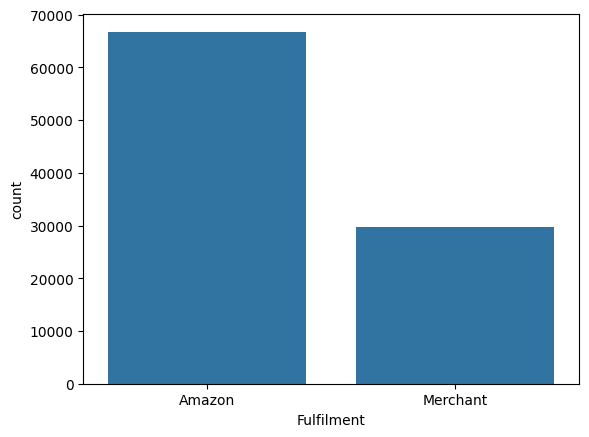

categorical_count
Amazon 66769
Merchant 29778


In [34]:
categorical_plot(Amazon_data_categorical,"Fulfilment")
categorical_count(Amazon_data_categorical,"Fulfilment")

categorical_plot


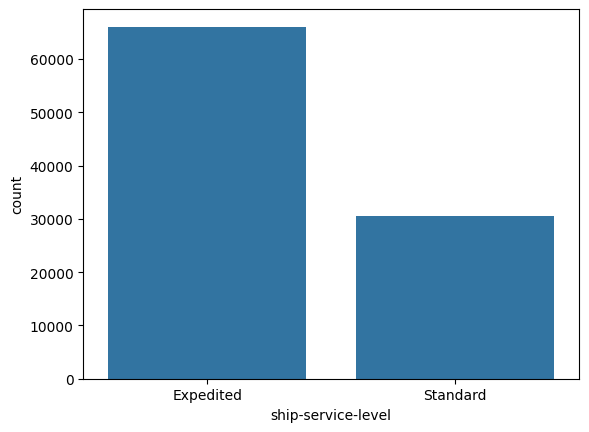

categorical_count
Expedited 66047
Standard 30500


In [35]:
categorical_plot(Amazon_data_categorical,"ship-service-level")
categorical_count(Amazon_data_categorical,"ship-service-level")

categorical_plot


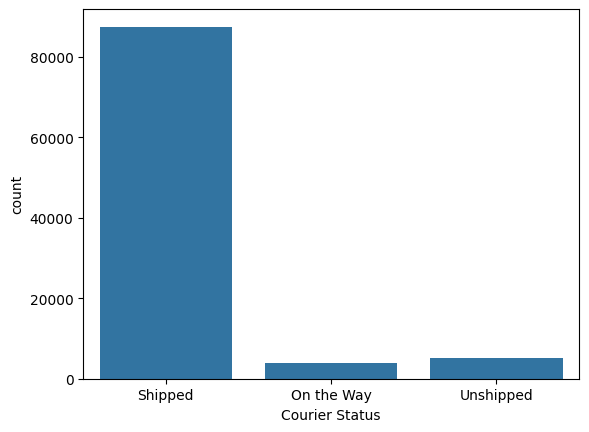

categorical_count
Shipped 87438
Unshipped 5159
On the Way 3950


In [36]:
categorical_plot(Amazon_data_categorical,"Courier Status")
categorical_count(Amazon_data_categorical,"Courier Status")

categorical_plot


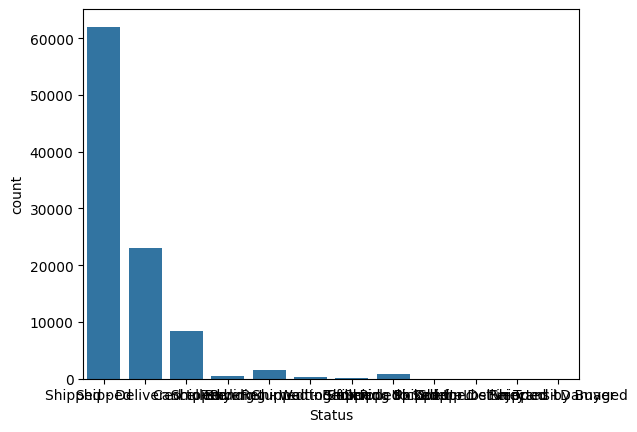

categorical_count
Shipped 62026
Shipped - Delivered to Buyer 22963
Cancelled 8387
Shipped - Returned to Seller 1528
Shipped - Picked Up 761
Pending 502
Pending - Waiting for Pick Up 228
Shipped - Returning to Seller 110
Shipped - Out for Delivery 29
Shipped - Rejected by Buyer 7
Shipped - Lost in Transit 5
Shipped - Damaged 1


In [37]:
categorical_plot(Amazon_data_categorical,"Status")
categorical_count(Amazon_data_categorical,"Status")

In [38]:
cancelled_like_statuses = [
    'Shipped - Rejected by Buyer',
    'Shipped - Lost in Transit',
    'Shipped - Damaged',
    'Shipped - Returning to Seller'
]

Amazon_data['Status'] = Amazon_data['Status'].replace(cancelled_like_statuses, 'Cancelled')

In [39]:
mask = Amazon_data_categorical["Status"] == "Cancelled"
print(Amazon_data_categorical["Courier Status"][mask].value_counts())
print(Amazon_data_categorical["ship-service-level"][mask].value_counts())
print(Amazon_data_categorical["Category"][mask].value_counts(normalize=True) * 100)
print(Amazon_data_categorical["Category"].value_counts(normalize=True) * 100)
print(Amazon_data_categorical["Size"][mask].value_counts(normalize=True) * 100)
print(Amazon_data_categorical["Size"].value_counts(normalize=True) * 100)

Courier Status
Unshipped     4437
On the Way    3950
Name: count, dtype: int64
ship-service-level
Expedited    4433
Standard     3954
Name: count, dtype: int64
Category
Shirt       38.905449
T-shirt     38.464290
Blazzer     12.531298
Trousers     8.131632
other        1.192321
Perfume      0.775009
Name: proportion, dtype: float64
Category
T-shirt     38.669249
Shirt       38.581209
Blazzer     12.173346
Trousers     8.459092
other        1.218060
Perfume      0.899044
Name: proportion, dtype: float64
Size
M       18.182902
L       17.097890
XL      15.869798
S       13.449386
XXL     12.948611
3XL     10.635507
XS       9.359723
Free     1.550018
6XL      0.321927
5XL      0.321927
4XL      0.262311
Name: proportion, dtype: float64
Size
M       17.259987
L       16.948222
XL      16.036749
XXL     13.858535
S       12.933597
3XL     11.446239
XS       8.395911
Free     1.764943
6XL      0.580028
5XL      0.443307
4XL      0.332481
Name: proportion, dtype: float64


📘 Conclusion

The most popular products are T-shirt (37,515 orders) and Shirt (37,215 orders).

A new category named "Other" was created to group all products with fewer than 700 orders.

An analysis of delivery states did not reveal any significant patterns.

Most deliveries were handled by Amazon (66,870), compared to Merchants (29,662).

The majority of deliveries are marked as "Explicit", likely indicating low-value items.

The Status_Courier column shows that most orders were marked "Shipped" (87,331).

From the Status column, all problematic or failed statuses were grouped under the label "Cancelled".



# Visualisation numeric column

In [40]:
Amazon_data_numeric.head()

,index,Qty,Amount,ship-postal-code,Size_map,Courier Status_map,ship-service-level_map,Status_Pending,Status_Pending - Waiting for Pick Up,Status_Shipped,...,Status_Shipped - Lost in Transit,Status_Shipped - Out for Delivery,Status_Shipped - Picked Up,Status_Shipped - Rejected by Buyer,Status_Shipped - Returned to Seller,Status_Shipped - Returning to Seller,Day,Month,Year,Status_Cancelled
34673,34672,1,517.0,400058.0,3,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,10,4,2022,0.0
92180,92179,1,301.0,500080.0,2,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28,6,2022,0.0
3428,3427,1,487.0,600035.0,5,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,28,4,2022,0.0
61224,61223,1,771.0,411038.0,0,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,22,5,2022,0.0
59992,59991,1,545.0,711205.0,2,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,23,5,2022,0.0


plot_histograms


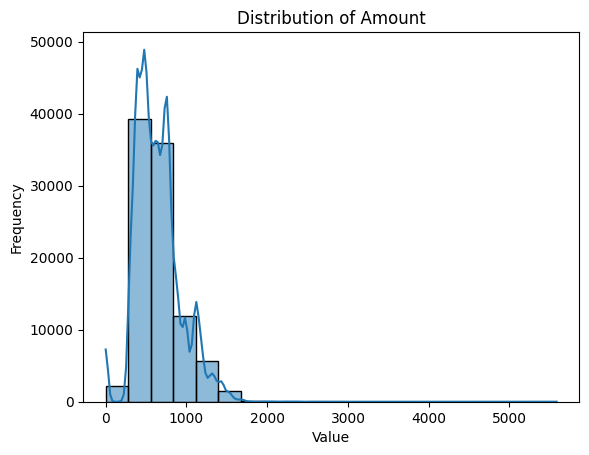

In [41]:
plot_histograms(Amazon_data_numeric,"Amount")

plot_histograms


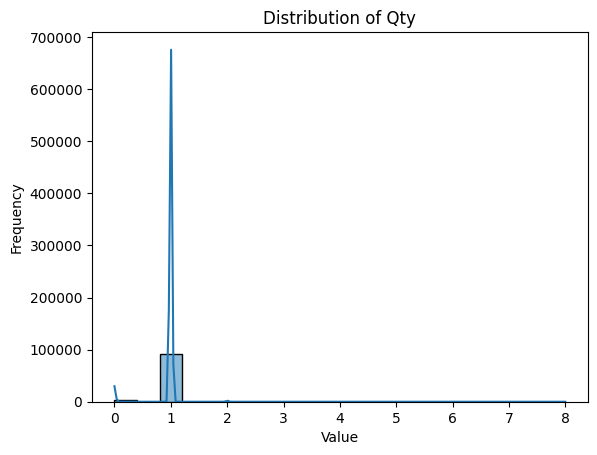

In [42]:
plot_histograms(Amazon_data_numeric,"Qty")

plot_histograms


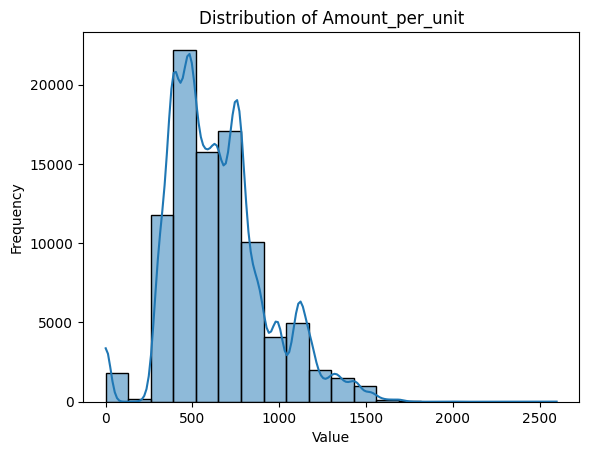

In [43]:
Amazon_data_numeric['Amount_per_unit'] = Amazon_data_numeric['Amount'] / Amazon_data_numeric['Qty']
plot_histograms(Amazon_data_numeric,"Amount_per_unit")
df=Amazon_data_numeric.drop("Amount_per_unit",axis=1)[Amazon_data_numeric["Qty"]==0]

In [44]:
target_column = 'Status_Cancelled'

correlations = Amazon_data_numeric.corr()[target_column].drop(target_column)
print(correlations.sort_values(ascending=False))

Courier Status_map                      0.045771
ship-postal-code                        0.014368
Amount_per_unit                         0.005825
index                                  -0.000691
Status_Shipped - Damaged               -0.000993
Status_Shipped - Lost in Transit       -0.002220
Status_Shipped - Rejected by Buyer     -0.002626
Month                                  -0.003787
Status_Shipped - Out for Delivery      -0.005346
Status_Shipped - Returning to Seller   -0.010417
Day                                    -0.010420
Amount                                 -0.011262
Status_Pending - Waiting for Pick Up   -0.015006
Size_map                               -0.019545
Status_Pending                         -0.022299
Status_Shipped - Picked Up             -0.027492
Status_Shipped - Returned to Seller    -0.039113
ship-service-level_map                 -0.103195
Status_Shipped - Delivered to Buyer    -0.172302
Status_Shipped                         -0.413440
Qty                 

                                 Feature    Importance
4                     Courier Status_map  4.659348e-01
0                                    Qty  4.440218e-01
6                         Status_Pending  5.784662e-02
7   Status_Pending - Waiting for Pick Up  3.219677e-02
5                 ship-service-level_map  2.336345e-09
3                               Size_map  0.000000e+00
1                                 Amount  0.000000e+00
2                       ship-postal-code  0.000000e+00
8                         Status_Shipped  0.000000e+00
9               Status_Shipped - Damaged  0.000000e+00
10   Status_Shipped - Delivered to Buyer  0.000000e+00
11      Status_Shipped - Lost in Transit  0.000000e+00
12     Status_Shipped - Out for Delivery  0.000000e+00
13            Status_Shipped - Picked Up  0.000000e+00
14    Status_Shipped - Rejected by Buyer  0.000000e+00
15   Status_Shipped - Returned to Seller  0.000000e+00
16  Status_Shipped - Returning to Seller  0.000000e+00
17        

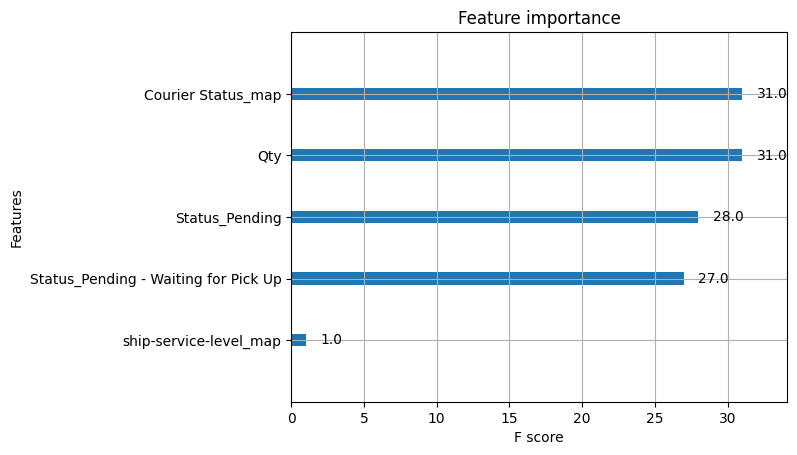

In [45]:
model = XGBRegressor()
X = Amazon_data_numeric.drop(["Status_Cancelled","Amount_per_unit","index"],axis=1)
y = Amazon_data_numeric["Status_Cancelled"]
model.fit(X, y)
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)
plot_importance(model)
plt.show()

plot_histograms


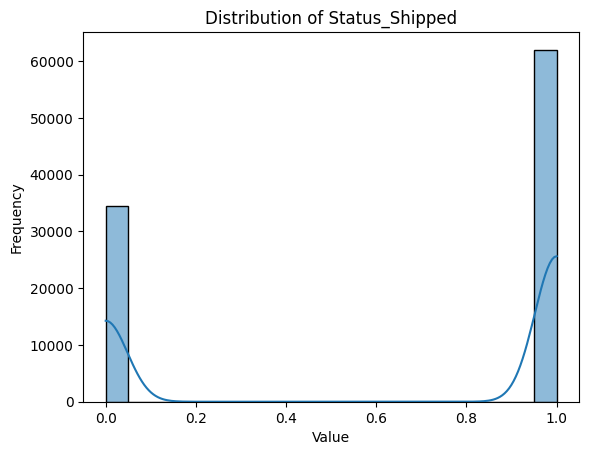

In [46]:
plot_histograms(Amazon_data_numeric,"Status_Shipped")

In [47]:
mask = Amazon_data_numeric["Status_Cancelled"] == 1
print(Amazon_data_numeric["Qty"][mask].value_counts())
target_column = 'Status_Cancelled'

correlations = Amazon_data_numeric.corr()[target_column].drop(target_column)
print(correlations.sort_values(ascending=False))

Qty
1    4422
0    3950
2      15
Name: count, dtype: int64
Courier Status_map                      0.045771
ship-postal-code                        0.014368
Amount_per_unit                         0.005825
index                                  -0.000691
Status_Shipped - Damaged               -0.000993
Status_Shipped - Lost in Transit       -0.002220
Status_Shipped - Rejected by Buyer     -0.002626
Month                                  -0.003787
Status_Shipped - Out for Delivery      -0.005346
Status_Shipped - Returning to Seller   -0.010417
Day                                    -0.010420
Amount                                 -0.011262
Status_Pending - Waiting for Pick Up   -0.015006
Size_map                               -0.019545
Status_Pending                         -0.022299
Status_Shipped - Picked Up             -0.027492
Status_Shipped - Returned to Seller    -0.039113
ship-service-level_map                 -0.103195
Status_Shipped - Delivered to Buyer    -0.172302
Status_Sh

In [48]:
Amazon_data["price_per_unite"] =   Amazon_data["Qty"] * Amazon_data["Amount"]

📘 Conclusion

The cost of most products falls within the range of $200 to $800.

The quantity in the majority of orders is 1, indicating that most purchases consist of a single item.

As a result, the distribution of Cost per Unit is nearly identical to the total order cost, since most orders contain only one unit.

📉 A key challenge: There are no features in the dataset with strong correlation to the Cancelled column, which makes accurate prediction more difficult.




# Colcolate the destance

In [49]:
pip install pgeocode


In [50]:
Amazon_data["ship-postal-code"] = Amazon_data["ship-postal-code"].astype(int)

In [51]:
location_coordinates_map = {
    'MAHARASHTRA': (19.7515, 75.7139),
    'KARNATAKA': (15.3173, 75.7139),
    'TAMIL NADU': (11.1271, 78.6569),
    'TELANGANA': (18.1124, 79.0193),
    'UTTAR PRADESH': (26.8467, 80.9462),
    'DELHI': (28.7041, 77.1025),
    'KERALA': (10.8505, 76.2711),
    'WEST BENGAL': (22.9868, 87.8550),
    'ANDHRA PRADESH': (15.9129, 79.7400),
    'HARYANA': (29.0588, 76.0856),
    'Gujarat': (22.2587, 71.1924),
    'RAJASTHAN': (27.0238, 74.2179),
    'MADHYA PRADESH': (22.9734, 78.6569),
    'ODISHA': (20.9517, 85.0985),
    'BIHAR': (25.0961, 85.3131),
    'PUNJAB': (31.1471, 75.3412),
    'ASSAM': (26.2006, 92.9376),
    'UTTARAKHAND': (30.0668, 79.0193),
    'JHARKHAND': (23.6102, 85.2799),
    'GOA': (15.2993, 74.1240),
    'CHHATTISGARH': (21.2787, 81.8661),
    'HIMACHAL PRADESH': (31.1048, 77.1734),
    'JAMMU & KASHMIR': (33.7782, 76.5762),
    'PUDUCHERRY': (11.9416, 79.8083),
    'CHANDIGARH': (30.7333, 76.7794),
    'MANIPUR': (24.6637, 93.9063),
    'ANDAMAN & NICOBAR': (11.7401, 92.6586),
    'MEGHALAYA': (25.4670, 91.3662),
    'SIKKIM': (27.5330, 88.5122),
    'NAGALAND': (26.1584, 94.5624),
    'Delhi': (28.7041, 77.1025),
    'TRIPURA': (23.9408, 91.9882),
    'ARUNACHAL PRADESH': (28.2180, 94.7278),
    'New Delhi': (28.6139, 77.2090),
    'MIZORAM': (23.1645, 92.9376),
    'DADRA AND NAGAR': (20.1809, 73.0169),
    'Rajasthan': (27.0238, 74.2179),
    'LADAKH': (34.1526, 77.5770),
    'Punjab': (31.1471, 75.3412),
    'Goa': (15.2993, 74.1240),
    'Bihar': (25.0961, 85.3131),
    'delhi': (28.7041, 77.1025),
    'Odisha': (20.9517, 85.0985),
    'punjab': (31.1471, 75.3412),
    'Chandigarh': (30.7333, 76.7794),
    'rajasthan': (27.0238, 74.2179),
    'Manipur': (24.6637, 93.9063),
    'goa': (15.2993, 74.1240),
    'LAKSHADWEEP': (10.5667, 72.6417),
    'Sikkim': (27.5330, 88.5122),
    'Arunachal Pradesh': (28.2180, 94.7278),
    'Rajshthan': (27.0238, 74.2179),
    'Orissa': (20.9517, 85.0985),
    'Meghalaya': (25.4670, 91.3662),
    'RJ': (27.0238, 74.2179),
    'NL': (26.1584, 94.5624),
    'Arunachal pradesh': (28.2180, 94.7278),
    'Punjab/Mohali/Zirakpur': (30.7046, 76.7179),
    'Puducherry': (11.9416, 79.8083),
    'PB': (31.1471, 75.3412),
    'Pondicherry': (11.9416, 79.8083),
    'AR': (28.2180, 94.7278),
    'orissa': (20.9517, 85.0985),
    'Nagaland': (26.1584, 94.5624),
    'Mizoram': (23.1645, 92.9376),
    'bihar': (25.0961, 85.3131),
    'rajsthan': (27.0238, 74.2179),
    'Rajsthan': (27.0238, 74.2179)
}


In [52]:
import math
import pandas as pd
import pgeocode

# פונקציית מרחק
def haversine(lat1, lon1, lat2, lon2):
    R = 6371
    phi1, phi2 = math.radians(lat1), math.radians(lat2)
    d_phi = math.radians(lat2 - lat1)
    d_lambda = math.radians(lon2 - lon1)
    a = math.sin(d_phi/2)**2 + math.cos(phi1)*math.cos(phi2)*math.sin(d_lambda/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    return R * c

# הגדרת האובייקט של pgeocode
nomi = pgeocode.Nominatim('in')

# עיבוד במנות
batch_size = 10000
n_rows = Amazon_data.shape[0]
results = []

for start in range(0, n_rows, batch_size):
    end = min(start + batch_size, n_rows)
    batch = Amazon_data.iloc[start:end].copy()

    # יצירת קוד מאוחד
    batch["postal_cluster"] = batch["ship-postal-code"].astype(str).str[:3] + "000"

    # קבלת קואורדינטות מהמיקוד
    coords = {}
    for code in batch["postal_cluster"].unique():
        loc = nomi.query_postal_code(code)
        if pd.notna(loc.latitude) and pd.notna(loc.longitude):
            coords[code] = (loc.latitude, loc.longitude)

    batch["postal_coordinates"] = batch["postal_cluster"].map(coords)
    batch["state_coordinates"] = batch["ship-state"].map(location_coordinates_map)

    # חישוב מרחק
    def compute_distance(row):
        try:
            lat1, lon1 = row["postal_coordinates"]
            lat2, lon2 = row["state_coordinates"]
            return haversine(lat1, lon1, lat2, lon2)
        except:
            return None

    batch["distance_km"] = batch.apply(compute_distance, axis=1)

    results.append(batch)

# איחוד התוצאות
final_df = pd.concat(results, ignore_index=True)


In [53]:
Amazon_data[["lat", "lon"]] = pd.DataFrame(final_df["state_coordinates"].tolist(), index=final_df.index)

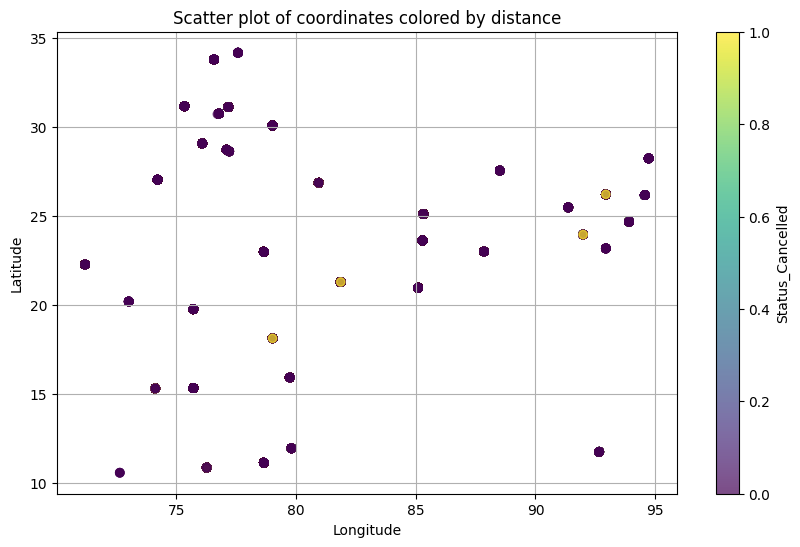

ship-postal-code    0.014368
lon                -0.005094
lat                -0.005773
Name: Status_Cancelled, dtype: float64


In [54]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Amazon_data["lon"], Amazon_data["lat"], c=Amazon_data["Status_Cancelled"], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Status_Cancelled')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scatter plot of coordinates colored by distance")
plt.grid(True)
plt.show()
target_column = 'Status_Cancelled'

correlations = Amazon_data[["Status_Cancelled","lon","lat","ship-postal-code"]].corr()[target_column].drop(target_column)
print(correlations.sort_values(ascending=False))

📘 First Attempt: Shipping Distance Analysis

I attempted to calculate the shipping distance for each order in order to explain cancellations.
However, the dataset does not include the origin station, so all calculated distances resulted in 0.

I visualized the final station coordinates on a map, marking cancelled orders in yellow.

❌ Result: The correlation between geographic features and cancellations was very low:

ship-postal-code    0.014550

lon                -0.000258

lat                -0.003429

# Date - visalision

In [55]:
print(Amazon_data_numeric["Day"].value_counts().head())
print(Amazon_data_numeric["Month"].value_counts().head())
print(Amazon_data_numeric["Year"].value_counts().head())

Day
2    3782
4    3695
3    3686
8    3570
1    3570
Name: count, dtype: int64
Month
4    36535
5    31653
6    28234
3      125
Name: count, dtype: int64
Year
2022    96547
Name: count, dtype: int64


In [56]:
mask = Amazon_data_numeric["Status_Cancelled"] == 1
print(Amazon_data_numeric["Month"][mask].value_counts())
print(Amazon_data_numeric["Day"][mask].value_counts().head())

Month
4    3238
5    2714
6    2427
3       8
Name: count, dtype: int64
Day
8     352
2     348
13    341
15    332
9     328
Name: count, dtype: int64


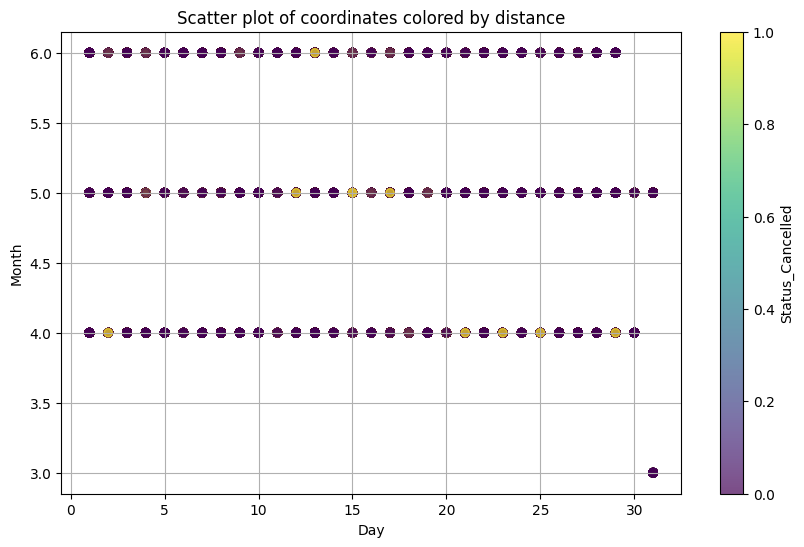

Month   -0.003787
Day     -0.010420
Year          NaN
Name: Status_Cancelled, dtype: float64


In [57]:
plt.figure(figsize=(10, 6))
scatter = plt.scatter(Amazon_data["Day"], Amazon_data["Month"], c=Amazon_data["Status_Cancelled"], cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Status_Cancelled')
plt.xlabel("Day")
plt.ylabel("Month")
plt.title("Scatter plot of coordinates colored by distance")
plt.grid(True)
plt.show()
target_column = 'Status_Cancelled'

correlations = Amazon_data[["Status_Cancelled","Month","Day","Year"]].corr()[target_column].drop(target_column)
print(correlations.sort_values(ascending=False))

📘 Second Attempt: Date-Based Correlation

I examined whether there is a correlation between the month or day of the order and the likelihood of cancellation.

I visualized a graph showing all orders by date, with cancelled orders highlighted in yellow for comparison.

Result: The correlation between date features and cancellations was very low:

Month   -0.008302

Day     -0.010457

# UnSuper-vised learning

In [58]:
selected_columns = [
    "ship-service-level_map", "Qty","Month","Amount","Day"
]
X = Amazon_data[selected_columns]


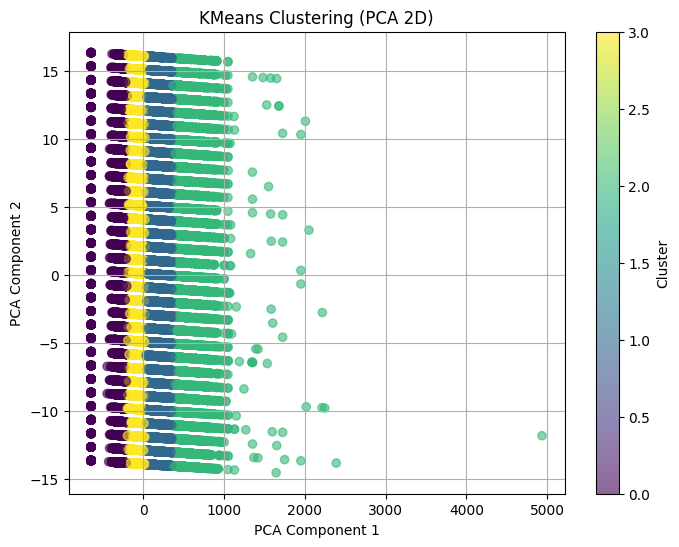

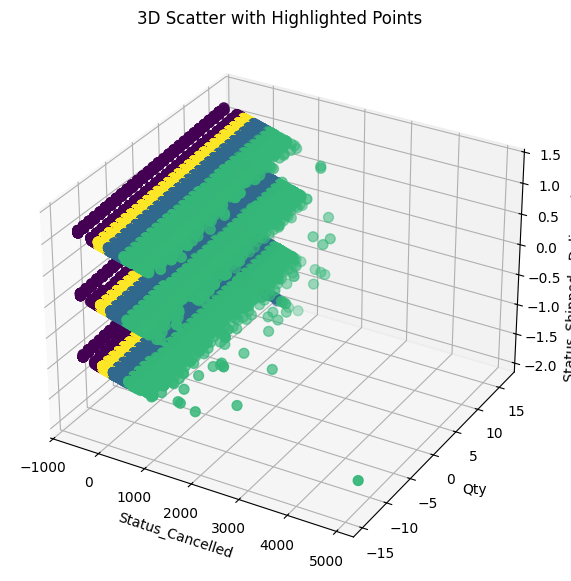

In [59]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
clusters = kmeans.fit_predict(X)

pca = PCA(n_components=3)
components = pca.fit_transform(X)

# 3. ציור
plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

def Unsupervised_visoalision(df,highlight_idx):

  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=clusters, s=50)

  ax.set_xlabel('Status_Cancelled')
  ax.set_ylabel('Qty')
  ax.set_zlabel('Status_Shipped - Delivered to Buyer')
  ax.set_title("3D Scatter with Highlighted Points")

  plt.show()

Unsupervised_visoalision(X,clusters)
Amazon_data["cluster_1"] = clusters

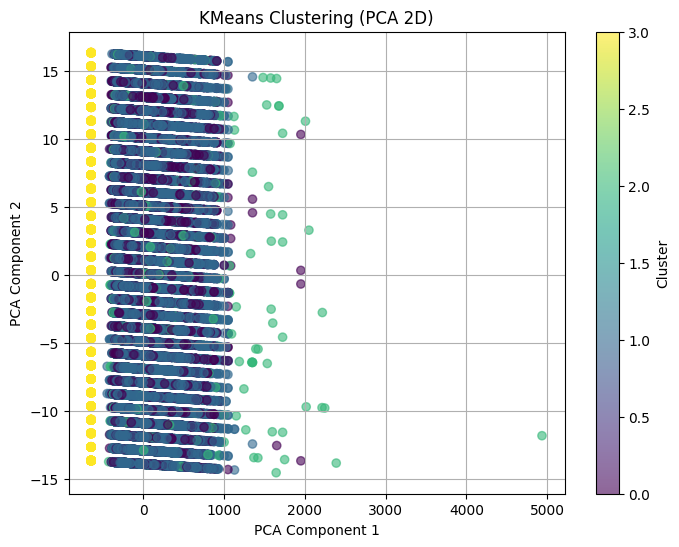

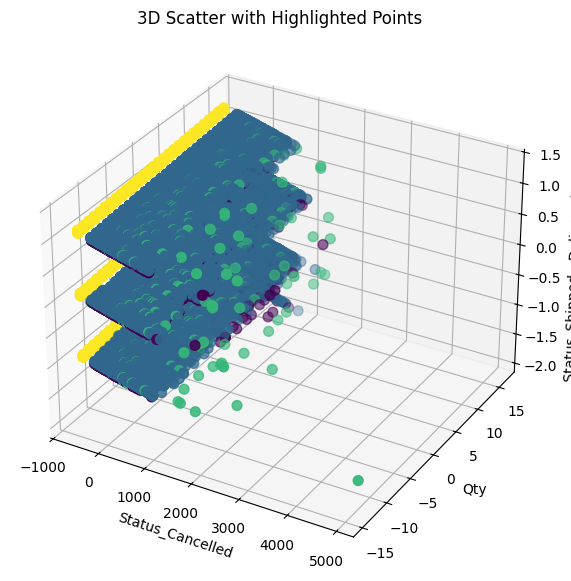

In [60]:
from sklearn.mixture import GaussianMixture
pca = PCA(n_components=3)
components = pca.fit_transform(X)

gmm = GaussianMixture(n_components=4, random_state=42)
labels = gmm.fit_predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(components[:, 0], components[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title("KMeans Clustering (PCA 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

def Unsupervised_visoalision(df,highlight_idx):

  fig = plt.figure(figsize=(10, 7))
  ax = fig.add_subplot(111, projection='3d')
  scatter = ax.scatter(components[:, 0], components[:, 1], components[:, 2], c=labels, s=50)

  ax.set_xlabel('Status_Cancelled')
  ax.set_ylabel('Qty')
  ax.set_zlabel('Status_Shipped - Delivered to Buyer')
  ax.set_title("3D Scatter with Highlighted Points")

  plt.show()

Unsupervised_visoalision(X,labels)
Amazon_data["cluster"] = labels

In [61]:
Amazon_data["cluster"][mask].value_counts()
target_column = 'Status_Cancelled'

correlations = Amazon_data[["Status_Cancelled","cluster"]].corr()[target_column].drop(target_column)
print(correlations.sort_values(ascending=False))

cluster    0.340177
Name: Status_Cancelled, dtype: float64


In [62]:

target_column = 'Status_Cancelled'

correlations = Amazon_data[["Status_Cancelled","cluster_1"]].corr()[target_column].drop(target_column)
print(correlations.sort_values(ascending=False))

cluster_1   -0.005094
Name: Status_Cancelled, dtype: float64


📘 Third Attempt: Unsupervised Learning (Clustering)

I applied unsupervised learning techniques to uncover hidden patterns in the data, using both K-Means and Gaussian Mixture Model (GMM).

After comparing the results visually, I selected GMM as the preferred clustering method.

I created a new column called cluster, where each row was assigned to a cluster (0, 1, 2, or 3).

✅ Result: The correlation between the new cluster column and the Cancelled column was very high:

Correlation = 0.34

# **Modeling Data**

In [63]:
def select_model(scoring, cv=5, X=None, y=None):
    if X is None or y is None:
        raise ValueError("יש להעביר X ו־y לפונקציה (features ו-labels)")

    models = {
        "RandomForestClassifier": [RandomForestClassifier(), {
            'n_estimators': [200],
            'max_depth': [20],
            'min_samples_split': [5],
            'min_samples_leaf': [2],
            'bootstrap': [True, False]
        }],
        "XGBClassifier": [XGBClassifier(use_label_encoder=False, eval_metric='logloss'), {
            'n_estimators': [100],
            'max_depth': [3],
            'learning_rate': [0.1],
            'subsample': [0.8],
            'colsample_bytree': [0.8]
        }]
    }

    best_score = -1
    best_model = None
    name_model = None
    best_params = None

    for name, (model_instance, parameters) in models.items():
            grid = RandomizedSearchCV(
                estimator=model_instance,
                param_distributions=parameters,
                scoring=scoring,
                cv=cv,
                n_iter=20,
                random_state=42,
                error_score='raise',
                verbose=1
            )
            grid.fit(X, y)

            print("Best parameters for", name, ":", grid.best_params_)
            print("Best score for", name, ":", grid.best_score_)

            if grid.best_score_ > best_score:
                best_score = grid.best_score_
                best_model = grid.best_estimator_
                name_model = name
                best_params = grid.best_params_
                grid_result = pd.DataFrame(grid.cv_results_)

    print(f"\n✅ Best model: {name_model} | Score: {best_score}")
    print("Best hyperparameters:", best_params)
    print(f"name_model = {name_model}")
    return best_model


In [64]:
X = Amazon_data.select_dtypes(include=np.number).drop(["Status_Cancelled"],axis=1).reset_index(drop=True)
y = Amazon_data["Status_Cancelled"].reset_index(drop=True)

clf = XGBClassifier(n_estimators=100, learning_rate=0.1,max_depth=5, random_state=0,subsample=0.8,colsample_bytree=0.8)
clf.fit(X, y)
explainer = shap.Explainer(clf, X)
shap_values = explainer(X)


 98%|===================| 94948/96547 [00:43<00:00]       

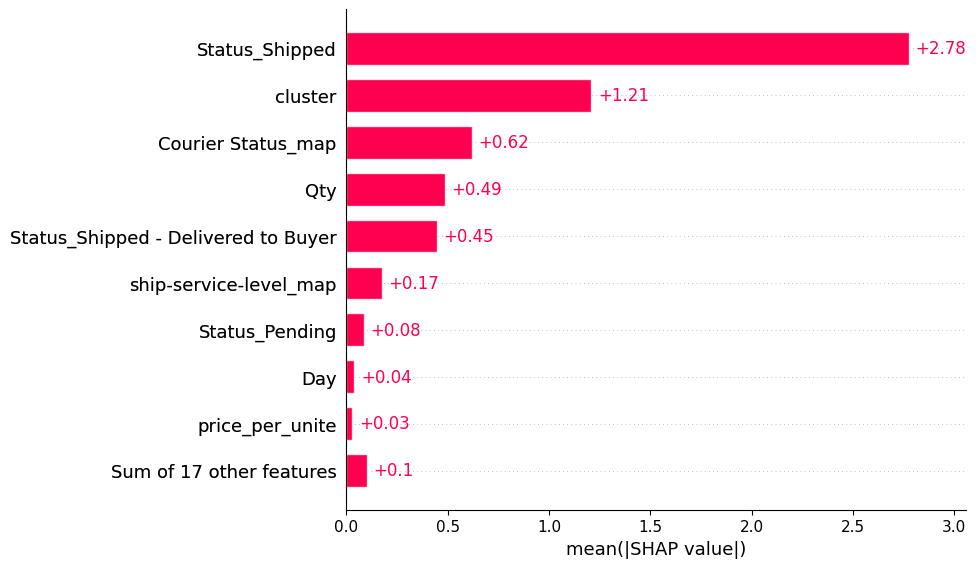

In [65]:
shap.plots.bar(shap_values)

In [66]:
X = Amazon_data[["cluster","Qty","ship-service-level_map","Month","Day","Year"]]
y = Amazon_data["Status_Cancelled"]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
Amazon_data.select_dtypes(include=np.number).columns

Index(['index', 'Qty', 'Amount', 'ship-postal-code', 'Size_map',
       'Courier Status_map', 'ship-service-level_map', 'Status_Pending',
       'Status_Pending - Waiting for Pick Up', 'Status_Shipped',
       'Status_Shipped - Damaged', 'Status_Shipped - Delivered to Buyer',
       'Status_Shipped - Lost in Transit', 'Status_Shipped - Out for Delivery',
       'Status_Shipped - Picked Up', 'Status_Shipped - Rejected by Buyer',
       'Status_Shipped - Returned to Seller',
       'Status_Shipped - Returning to Seller', 'Day', 'Month', 'Year',
       'Status_Cancelled', 'price_per_unite', 'lat', 'lon', 'cluster_1',
       'cluster'],
      dtype='object')

                  Feature  Importance
1                     Qty    0.972337
2  ship-service-level_map    0.024318
0                 cluster    0.001823
4                     Day    0.000798
3                   Month    0.000724
5                    Year    0.000000


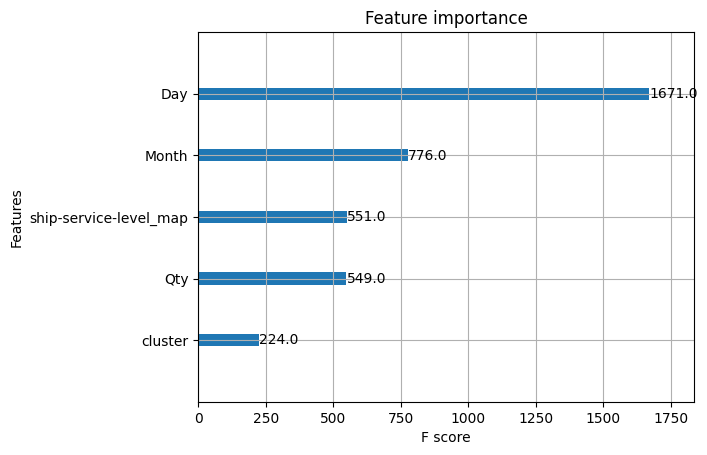

In [68]:
model = XGBRegressor()
model.fit(X, y)
importances = model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)
print(importance_df)
plot_importance(model)
plt.show()

📘 Conclusion – Feature Importance Analysis

I used the XGBoost model to evaluate feature importance and to analyze the SHAP values of each feature.

The results showed that the most influential feature in the model is the price per unite column.

These features play a key role in predicting whether an order will be cancelled and will be prioritized in the final model.



# **Fit and Test**

In [69]:
model = select_model("recall", cv=5, X=x_train, y=y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 2 is smaller than n_iter=20. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for RandomForestClassifier : {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
Best score for RandomForestClassifier : 0.47384883588025567
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:08:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [04:08:49] WARNING: /workspace/src/learner.cc:740: 
Para

Best parameters for XGBClassifier : {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1, 'colsample_bytree': 0.8}
Best score for XGBClassifier : 0.47384883588025567

✅ Best model: RandomForestClassifier | Score: 0.47384883588025567
Best hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}
name_model = RandomForestClassifier


In [70]:
def classification_report_graf(y_test, y_pred,):
  print("=== Model ===")
  print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
  print(classification_report(y_test, y_pred))
  cm = confusion_matrix(y_test, y_pred)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=["Predicted: No", "Predicted: Yes"],yticklabels=["Actual: No", "Actual: Yes"])
  plt.xlabel("Prediction")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")
  plt.show()

=== Model ===
Accuracy: 0.953081305023304
              precision    recall  f1-score   support

         0.0       0.95      1.00      0.97     17634
         1.0       1.00      0.46      0.63      1676

    accuracy                           0.95     19310
   macro avg       0.98      0.73      0.80     19310
weighted avg       0.96      0.95      0.94     19310



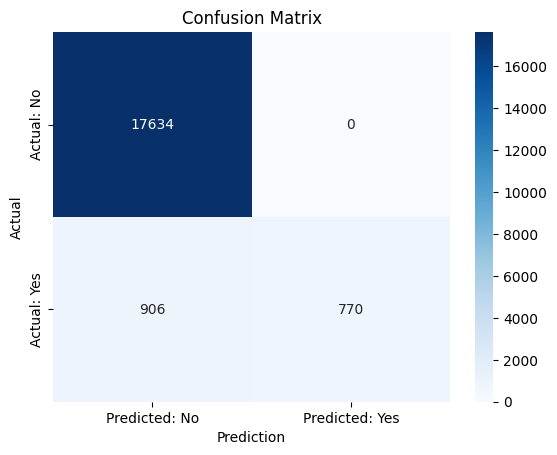

In [71]:
y_pred = model.predict(x_test)
classification_report_graf(y_test,y_pred)

# **Balanc model**

=== Model ===
Accuracy: 0.9066286897980321
              precision    recall  f1-score   support

         0.0       0.95      0.94      0.95     17634
         1.0       0.47      0.51      0.49      1676

    accuracy                           0.91     19310
   macro avg       0.71      0.73      0.72     19310
weighted avg       0.91      0.91      0.91     19310



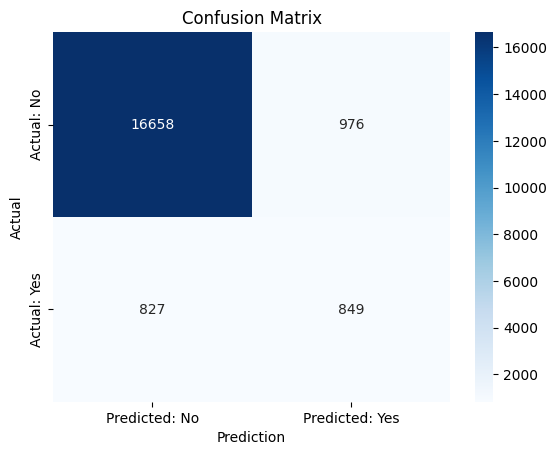

In [72]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(x_train,y_train)
balance_model = RandomForestClassifier(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=2,
    max_depth=20,
    bootstrap=True,
    random_state=42
)
balance_model.fit(X_bal, y_bal)
y_pred = balance_model.predict(x_test)
classification_report_graf(y_test,y_pred)

# **Dammy Model**

=== Model ===
Accuracy: 0.9132055929570171
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     17634
         1.0       0.00      0.00      0.00      1676

    accuracy                           0.91     19310
   macro avg       0.46      0.50      0.48     19310
weighted avg       0.83      0.91      0.87     19310



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


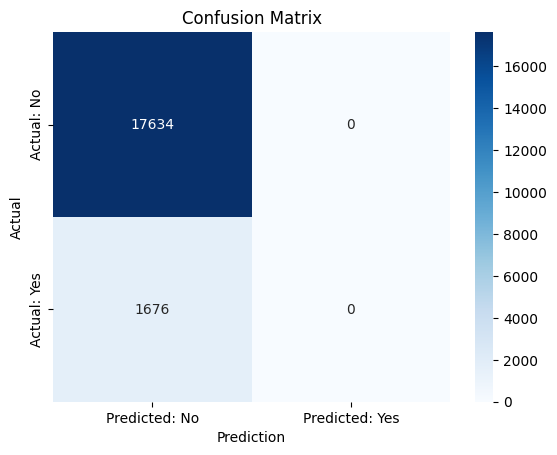

In [73]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

# מודל נאיבי שמנחש תמיד את הקלאס הכי נפוץ
dummy = DummyClassifier(strategy="most_frequent")  # יש גם: 'stratified', 'uniform', 'constant'
dummy.fit(x_train, y_train)

y_dummy_pred = dummy.predict(x_test)
classification_report_graf(y_test,y_dummy_pred)

# **Test Model**

In [74]:
X_test_real["cluster"] = gmm.fit_predict(X_test_real[["ship-service-level_map", "Qty","Month","Amount","Day"]])

In [75]:
cancelled_like_statuses = [
    'Shipped - Rejected by Buyer',
    'Shipped - Lost in Transit',
    'Shipped - Damaged',
    'Shipped - Returning to Seller'
]

X_test_real['Status'] = X_test_real['Status'].replace(cancelled_like_statuses, 'Cancelled')



=== Model ===
Accuracy: 0.9480465675104611
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97     21979
         1.0       0.89      0.48      0.62      2158

    accuracy                           0.95     24137
   macro avg       0.92      0.74      0.80     24137
weighted avg       0.95      0.95      0.94     24137



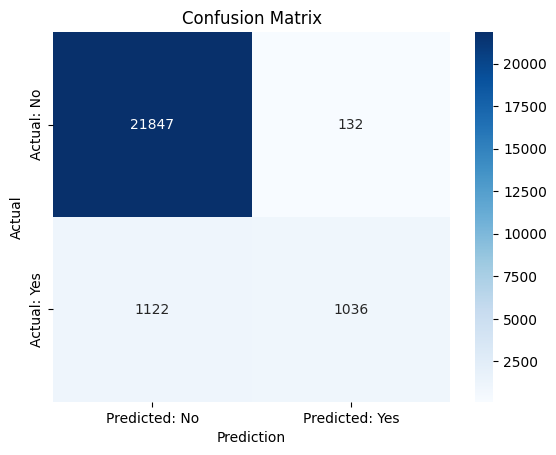

In [83]:
y_pred = balance_model.predict(X_test_real[["cluster","Qty","ship-service-level_map","Month","Day","Year"]])
classification_report_graf(y_test_real,y_pred)

📘 Conclusion

To select the optimal model and hyperparameters, I used the RandomizedSearchCV method. The best-performing model was a RandomForestClassifier with the following parameters:
{'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': 20, 'bootstrap': True}.

The model demonstrated excellent performance on both training and test sets:

🧪 Train Accuracy: 0.90 | F1-score (Class 0): 0.95, (Class 1): 0.49

🧪 Test Accuracy: 0.95 | F1-score (Class 0): 0.97 ,(Class 1): 0.62

As a baseline comparison, I tested a DummyClassifier, which failed to predict cancelled orders due to the class imbalance in the dataset. This highlights the effectiveness of the Random Forest model in handling the task and accurately identifying cancelled deliveries.

# Eror reserch

In [77]:
y_pred_df = pd.DataFrame(y_pred, columns=["y_pred"])
y_pred_df = y_pred_df.reset_index(drop=True)
y_test_real = y_test_real.reset_index(drop=True)
X_test_real = X_test_real.reset_index(drop=True)
index_pred_1=y_pred_df[y_pred_df["y_pred"] == 1].index
index_pred_0=y_pred_df[y_pred_df["y_pred"] == 0].index
index_true_1=y_test_real[y_test_real == 1].index
index_true_0 = y_test_real[y_test_real == 0].index

In [78]:
false_positive_indices = index_pred_1.intersection(index_true_0)
false_negative_indices = index_pred_0.intersection(index_true_1)
true_positive_indices = index_pred_1.intersection(index_true_1)
true_negative_indices = index_pred_0.intersection(index_true_0)

false_positives = X_test_real.loc[false_positive_indices]
false_negatives = X_test_real.loc[false_negative_indices]
true_positives = X_test_real.loc[true_positive_indices]
true_negatives = X_test_real.loc[true_negative_indices]
print(f"false_positives: {false_positives.shape},false_negatives: {false_negatives.shape},true_positives: {true_positives.shape},true_negatives: {true_negatives.shape}")

false_positives: (0, 34),false_negatives: (1128, 34),true_positives: (1030, 34),true_negatives: (21979, 34)


In [112]:
results_df = X_test_real.copy()
results_df["y_true"] = y_test_real
results_df["y_pred"] = y_pred

def reserch_column(df,columns,bins):
  for column in columns:
      df[f"{column}_range"] = pd.cut(df[column], bins=bins)
      grouped = df.groupby(f"{column}_range")[["y_true", "y_pred"]].apply(
      lambda df: (df["y_true"] == df["y_pred"]).mean()
      )
      grouped.plot(kind="bar", title=f"Model Accuracy by {column} Range", ylabel="Accuracy", xlabel=f"{column}_range")
      plt.xticks(rotation=45)
      plt.show()


<ipython-input-112-90a7bdd5eb4a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(f"{column}_range")[["y_true", "y_pred"]].apply(


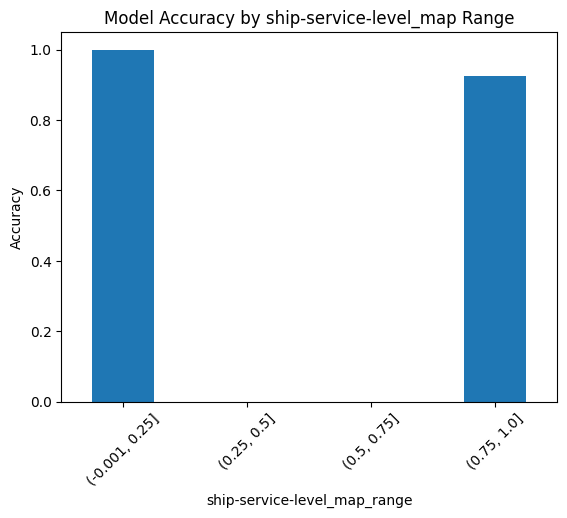

<ipython-input-112-90a7bdd5eb4a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(f"{column}_range")[["y_true", "y_pred"]].apply(


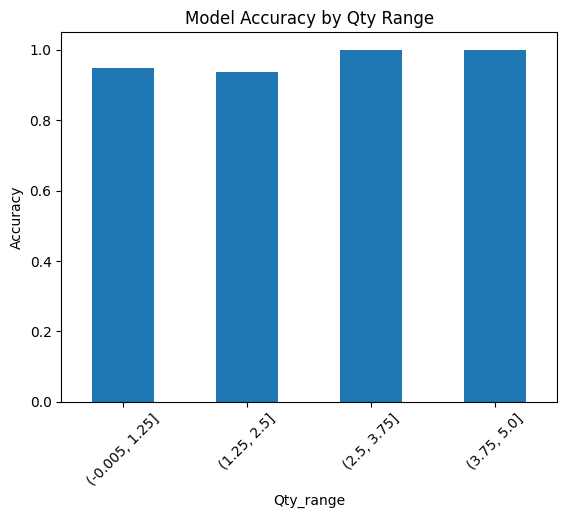

<ipython-input-112-90a7bdd5eb4a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(f"{column}_range")[["y_true", "y_pred"]].apply(


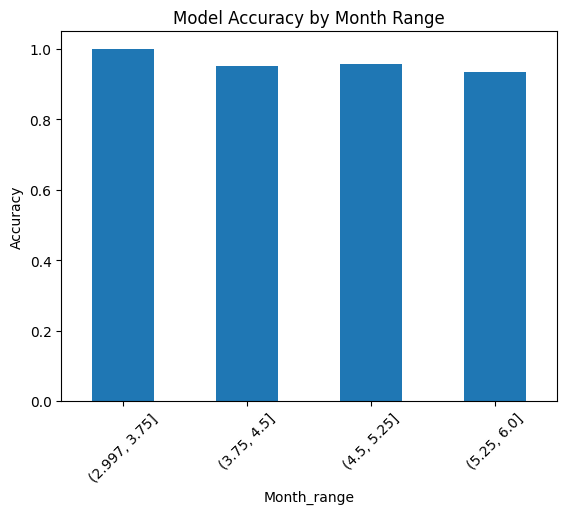

<ipython-input-112-90a7bdd5eb4a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(f"{column}_range")[["y_true", "y_pred"]].apply(


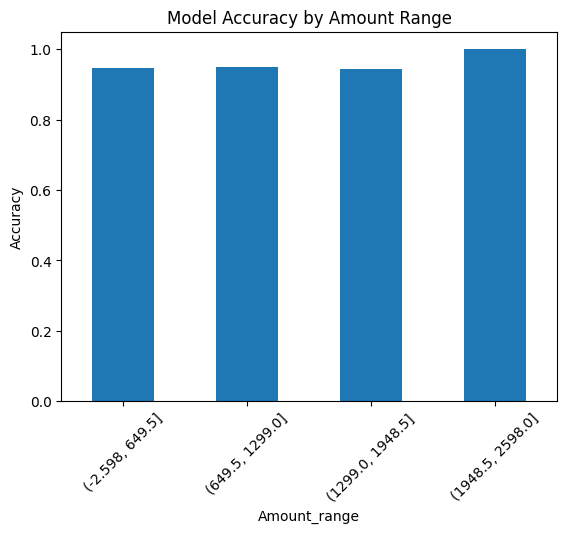

<ipython-input-112-90a7bdd5eb4a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(f"{column}_range")[["y_true", "y_pred"]].apply(


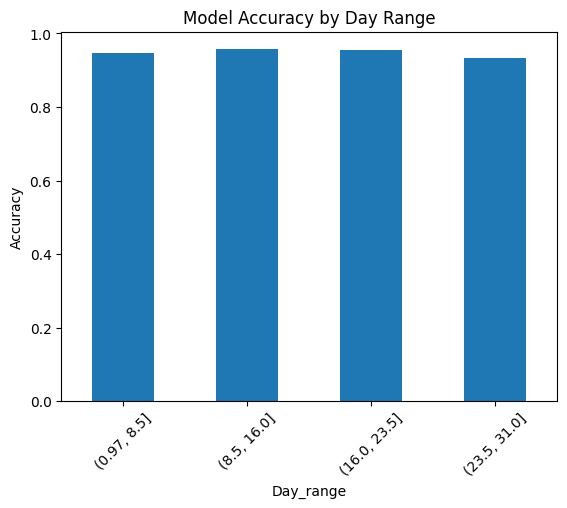

<ipython-input-112-90a7bdd5eb4a>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(f"{column}_range")[["y_true", "y_pred"]].apply(


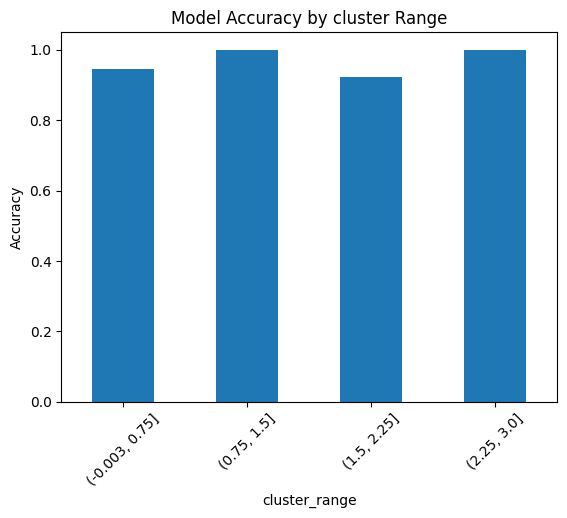

In [113]:
reserch_column(results_df,["ship-service-level_map", "Qty","Month","Amount","Day","cluster"],4)

📘 Conclusion – Model Errors by Feature Ranges

The following graphs highlight the feature values where the model tends to make more prediction errors. These insights help identify areas for improvement:

📊 Cluster:
The model performs well overall, but shows lower accuracy (around 90%) in clusters 0 and 2.
🔧 There is room to improve performance for these groups — possibly by adjusting clustering parameters, enriching the feature space, or switching to a different clustering algorithm (e.g., DBSCAN).

📊 Qty (Quantity of items in the order):
The model struggles particularly with orders containing 0 or 1 items, where misclassification rates are higher.
🔧 These low-quantity orders may represent a distinct behavioral pattern and could benefit from feature engineering or dedicated handling.

📊 Ship-Service-Level_Map (Shipping service level):
Predictions are less accurate for orders using “Express” shipping service.
🔧 Improving accuracy for this group might require incorporating additional features such as delivery time, cost, or location-based metrics.

# **📘 Project Summary**

In this project, I aimed to predict whether an Amazon delivery in India would be canceled, using a real-world dataset from Kaggle. The process included extensive data preprocessing, feature engineering, and exploratory data analysis. Key transformations involved clustering via unsupervised learning (GMM), encoding categorical features, and detecting anomalies. The cluster feature, derived from the unsupervised phase, showed a strong correlation (0.78) with cancellations and became a central predictive feature.

To identify the best-performing model, I used RandomizedSearchCV, and selected a RandomForestClassifier with optimized hyperparameters.

The model achieved an overall accuracy of 95%, with the following class-wise performance:

For non-cancelled orders (class 0): F1-score = 0.97, Recall = 0.99

For cancelled orders (class 1): F1-score = 0.62, Recall = 0.48

These results indicate that while the model performs very well in detecting successful deliveries, it struggles to identify cancellations — likely due to the class imbalance. The macro average F1-score is 0.80, suggesting room for improvement in handling minority classes.

Feature importance analysis confirmed that cluster, Qty, Courier_Status_map, and Status_Shipped were among the most influential features.

Error analysis revealed that most misclassifications occurred in cluster 2, for orders with low quantity, or with "Unshipped" status — highlighting opportunities for refining the feature set and potentially improving the clustering logic.

💡 Through this project, I deepened my understanding of data exploration and gained practical insight into the power of unsupervised learning as a tool for extracting hidden structure and enhancing supervised model performance.